# 2 GETTING FAMILIAR WITH MACHINE LEARNING LIBRARIES

## 5TH MARCH 2022

- JOLINSON RICHI 
- 21122030


# Lab Overview
## Objectives
Solve the below 10-step problem:  
1. Download the 80-cereals dataset from https://www.kaggle.com/crawford/80-cereals
2. Load the dataset using pd.read_csv method
3. a. In the column "mfr", replace the column "K" as "Kellogg's", "G" as "Nestle" and all other values as "Other Brands"
   b. In the column "type", replace "C" with "Type 1" and "H" with "Type 2"
4. Visualise the count of above two features "mfr" and "type" with a bar-plot
5. Describe the five-number summary and boxplots of the features - protien, sugars, fat, carbo
6. Plot Histograms for the features - fat, carbo, sodium, fiber
7. Split the datasets into following ratios: 60:40, 70:30, 80:20. Write down what happens when you give "random_state" parameter with a constant value and what happens if you do not mention the parameter at all.
8. Apply MinMaxScaler() and StandardScaler() to the following features: calories, protien, fat, sodium, fiber, carbo, sugars.
9. Does the standard or min-max scaling make a difference in value distribution? Support your answers with some visualisations on the above dataset.
10. As an extension of 7th step, Generate a new Pandas DataFrame with the following columns based on the Training Dataset: Split Ratio | Random State | Total Number of Entries | Count of Kellogg's | Count of Nestle | Count of Other Brands

### 1. Download the 80-cereals dataset from https://www.kaggle.com/crawford/80-cereals


In [1]:
import pandas as pd
import matplotlib as mlp
import sklearn as sk 
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Load the dataset using pd.read_csv method

In [2]:
cereals = pd.read_csv(r'D:/AJR/RfrML/dataset/cereal.csv')

In [3]:
cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [4]:
df = pd.DataFrame(cereals)
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


### 3a. In the column "mfr", replace the column "K" as "Kellogg's", "G" as "Nestle" and all other values as "Other Brands" 

In [5]:
df["mfr"].replace({"K": "Kellog's", "G": "Nestle",}, inplace=True)
for i in df['mfr']:
    if i != "Kellog's" and i !="Nestle":
        df["mfr"].replace({i:"Other Brands"}, inplace=True)
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Other Brands,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Other Brands,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kellog's,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kellog's,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Other Brands,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,Nestle,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,Nestle,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,Other Brands,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,Nestle,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


### b. In the column "type", replace "C" with "Type 1" and "H" with "Type 2"

In [55]:
df['type'].replace({"C":"Type1","H":"Type2"},inplace=True)

In [56]:
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Other Brands,Type1,-1.905397,1.337319,-0.012988,-0.356306,3.314439,-2.257639,-0.208807,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Other Brands,Type1,0.677623,0.417912,3.987349,-1.737087,-0.064172,-1.551936,0.244099,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kellog's,Type1,-1.905397,1.337319,-0.012988,1.204578,2.892113,-1.787170,-0.435260,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kellog's,Type1,-2.938605,1.337319,-1.013072,-0.236238,5.003745,-1.551936,-1.567525,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Other Brands,Type1,0.161019,-0.501495,0.987096,0.484170,-0.486498,-0.140530,0.244099,-1,25,3,1.0,0.75,34.384843


### 4. Visualise the count of above two features "mfr" and "type" with a bar-plot.

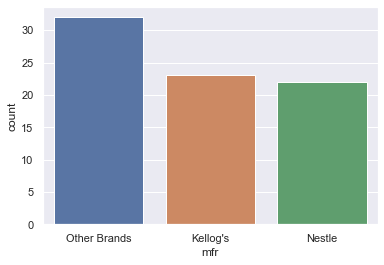

In [7]:
sns.set(style='darkgrid')
count = sns.countplot(x='mfr',data=cereals)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

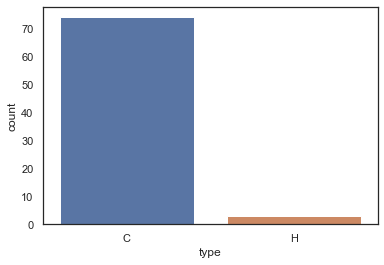

In [8]:
sns.set(style="white")
count=sns.countplot(x='type',data = cereals)
plt.show

### 5. Describe the five-number summary and boxplots of the features - protien, sugars, fat, carbo.

In [9]:
cereals[['protein','fat','sugars','carbo']].describe()

,protein,fat,sugars,carbo
count,77.000000,77.000000,77.000000,77.000000
mean,2.545455,1.012987,6.922078,14.597403
std,1.094790,1.006473,4.444885,4.278956
min,1.000000,0.000000,-1.000000,-1.000000
25%,2.000000,0.000000,3.000000,12.000000
50%,3.000000,1.000000,7.000000,14.000000
75%,3.000000,2.000000,11.000000,17.000000
max,6.000000,5.000000,15.000000,23.000000


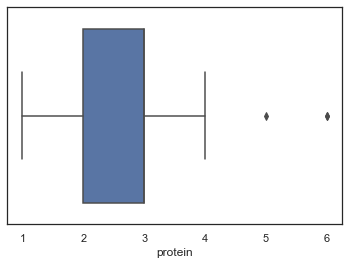

In [10]:
box1 = sns.boxplot(x='protein',data = cereals)

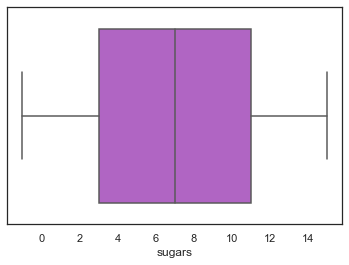

In [11]:
box2 = sns.boxplot(x='sugars',data=cereals,color='#BA55D3')

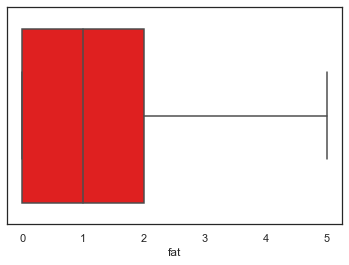

In [12]:
box3 = sns.boxplot(x='fat',data=cereals,color='red')

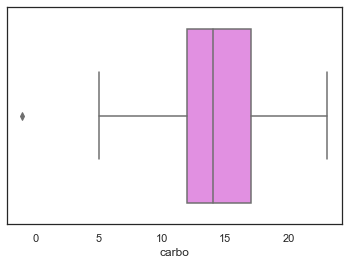

In [13]:
box3 = sns.boxplot(x='carbo',data=cereals,color='#EE82EE')

### 6. Plot Histograms for the features - fat, carbo, sodium, fiber

<AxesSubplot:xlabel='fat', ylabel='Count'>

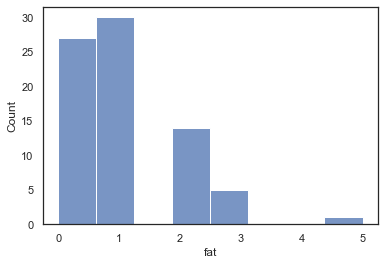

In [14]:
sns.histplot(data=cereals,x='fat')

<AxesSubplot:xlabel='carbo', ylabel='Count'>

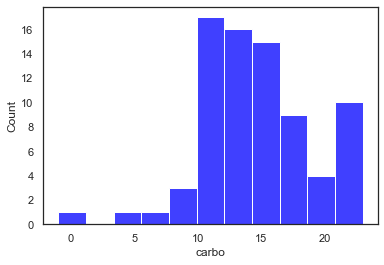

In [15]:
sns.histplot(data=cereals,x='carbo',color = "blue")

<AxesSubplot:xlabel='sodium', ylabel='Count'>

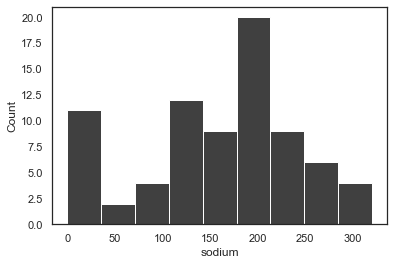

In [16]:
sns.histplot(data=cereals,x='sodium',color = "black")

<AxesSubplot:xlabel='fiber', ylabel='Count'>

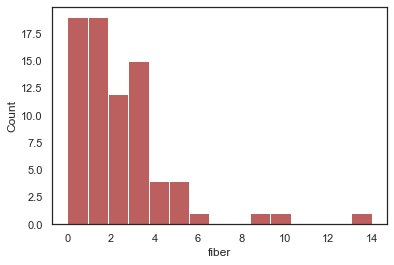

In [17]:
sns.histplot(data=cereals,x='fiber',color = "brown")

### 7. Split the datasets into following ratios: 60:40, 70:30, 80:20. Write down what happens when you give "random_state" parameter with a constant value and what happens if you do not mention the parameter at all.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_data,test_data=train_test_split(cereals,test_size=0.4,random_state=20)

In [20]:
print(train_data)

                                 name           mfr type  calories  protein  \
24                        Froot Loops      Kellog's    C       110        2   
14                        Cocoa Puffs        Nestle    C       110        1   
50                  Nutri-grain Wheat      Kellog's    C        90        3   
29                     Fruity Pebbles  Other Brands    C       110        1   
45  Muesli Raisins; Peaches; & Pecans  Other Brands    C       150        4   
64             Shredded Wheat 'n'Bran  Other Brands    C        90        3   
60                     Raisin Squares      Kellog's    C        90        2   
76                Wheaties Honey Gold        Nestle    C       110        2   
44   Muesli Raisins; Dates; & Almonds  Other Brands    C       150        4   
65          Shredded Wheat spoon size  Other Brands    C        90        3   
17                          Corn Pops      Kellog's    C       110        1   
53                         Product 19      Kellog's 

In [21]:
print(test_data)

                                      name           mfr type  calories  \
52                   Post Nat. Raisin Bran  Other Brands    C       120   
36                      Honey Nut Cheerios        Nestle    C       110   
42                            Lucky Charms        Nestle    C       110   
69                       Total Corn Flakes        Nestle    C       110   
72                                 Triples        Nestle    C       110   
41                                    Life  Other Brands    C       100   
0                                100% Bran  Other Brands    C        70   
31                          Golden Grahams        Nestle    C       110   
21                                 Crispix      Kellog's    C       110   
5                  Apple Cinnamon Cheerios        Nestle    C       110   
75                                Wheaties        Nestle    C       100   
12                   Cinnamon Toast Crunch        Nestle    C       120   
38             Just Right

In [22]:
print(len(train_data))

46


In [23]:
print(len(test_data))

31


In [24]:
train_data1,test_data1=train_test_split(cereals,test_size=0.5,random_state=150)
print(train_data1)
print(test_data1)

                                      name           mfr type  calories  \
16                             Corn Flakes      Kellog's    C       100   
52                   Post Nat. Raisin Bran  Other Brands    C       120   
36                      Honey Nut Cheerios        Nestle    C       110   
51                    Oatmeal Raisin Crisp        Nestle    C       130   
11                                Cheerios        Nestle    C       110   
15                               Corn Chex  Other Brands    C       110   
4                           Almond Delight  Other Brands    C       110   
31                          Golden Grahams        Nestle    C       110   
26                     Frosted Mini-Wheats      Kellog's    C       100   
12                   Cinnamon Toast Crunch        Nestle    C       120   
56                      Quaker Oat Squares  Other Brands    C       100   
39                  Just Right Fruit & Nut      Kellog's    C       140   
3                All-Bran

In [25]:
print(len(train_data1))
print(len(test_data1))

38
39


In [26]:
train_data,test_data=train_test_split(cereals,test_size=0.5)
print(train_data)
print(test_data)

                                      name           mfr type  calories  \
70                       Total Raisin Bran        Nestle    C       140   
37                              Honey-comb  Other Brands    C       110   
59                         Raisin Nut Bran        Nestle    C       100   
13                                Clusters        Nestle    C       110   
49               Nutri-Grain Almond-Raisin      Kellog's    C       140   
44        Muesli Raisins; Dates; & Almonds  Other Brands    C       150   
63                          Shredded Wheat  Other Brands    C        80   
12                   Cinnamon Toast Crunch        Nestle    C       120   
3                All-Bran with Extra Fiber      Kellog's    C        50   
27  Fruit & Fibre Dates; Walnuts; and Oats  Other Brands    C       120   
33                              Grape-Nuts  Other Brands    C       110   
14                             Cocoa Puffs        Nestle    C       110   
41                       

In [27]:
print(len(train_data))
print(len(test_data))

38
39


In [28]:
train_data2,test_data2=train_test_split(cereals,test_size=0.3,random_state=55)
print(train_data2)
print(train_data2)

                                      name           mfr type  calories  \
22                  Crispy Wheat & Raisins        Nestle    C       100   
41                                    Life  Other Brands    C       100   
38             Just Right Crunchy  Nuggets      Kellog's    C       110   
49               Nutri-Grain Almond-Raisin      Kellog's    C       140   
42                            Lucky Charms        Nestle    C       110   
67                               Special K      Kellog's    C       110   
34                      Great Grains Pecan  Other Brands    C       120   
30                            Golden Crisp  Other Brands    C       100   
66                                  Smacks      Kellog's    C       110   
16                             Corn Flakes      Kellog's    C       100   
62                           Rice Krispies      Kellog's    C       110   
40                                     Kix        Nestle    C       110   
59                       

In [29]:
print(len(train_data2))
print(len(test_data2))

53
24


In [30]:
train_data,test_data=train_test_split(cereals,test_size=0.1)
print(train_data2)
print(test_data2)

                                      name           mfr type  calories  \
22                  Crispy Wheat & Raisins        Nestle    C       100   
41                                    Life  Other Brands    C       100   
38             Just Right Crunchy  Nuggets      Kellog's    C       110   
49               Nutri-Grain Almond-Raisin      Kellog's    C       140   
42                            Lucky Charms        Nestle    C       110   
67                               Special K      Kellog's    C       110   
34                      Great Grains Pecan  Other Brands    C       120   
30                            Golden Crisp  Other Brands    C       100   
66                                  Smacks      Kellog's    C       110   
16                             Corn Flakes      Kellog's    C       100   
62                           Rice Krispies      Kellog's    C       110   
40                                     Kix        Nestle    C       110   
59                       

### 8. Apply MinMaxScaler() and StandardScaler() to the following features: calories, protien, fat, sodium, fiber, carbo, sugars.

In [31]:
from sklearn.preprocessing import MinMaxScaler as mi

<AxesSubplot:xlabel='fat', ylabel='Count'>

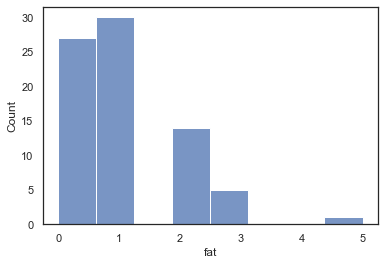

In [32]:
sns.histplot(data=cereals,x='fat')

<AxesSubplot:xlabel='sodium', ylabel='Count'>

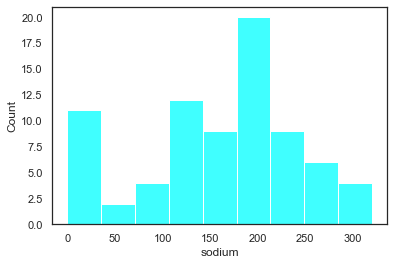

In [33]:
sns.histplot(data=cereals,x='sodium',color='Cyan')

<AxesSubplot:xlabel='protein', ylabel='Count'>

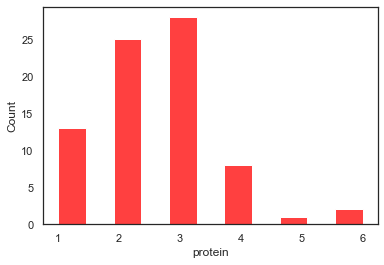

In [34]:
sns.histplot(data=cereals,x='protein',color='red')

In [35]:
trans = mi()
e=cereals[['calories', 'protein','fat','sodium','fiber','carbo','sugars']] = trans.fit_transform(cereals[['calories', 'protein','fat','sodium','fiber','carbo','sugars']])

In [36]:
e

array([[0.18181818, 0.6       , 0.2       , 0.40625   , 0.71428571,
        0.25      , 0.4375    ],
       [0.63636364, 0.4       , 1.        , 0.046875  , 0.14285714,
        0.375     , 0.5625    ],
       [0.18181818, 0.6       , 0.2       , 0.8125    , 0.64285714,
        0.33333333, 0.375     ],
       [0.        , 0.6       , 0.        , 0.4375    , 1.        ,
        0.375     , 0.0625    ],
       [0.54545455, 0.2       , 0.4       , 0.625     , 0.07142857,
        0.625     , 0.5625    ],
       [0.54545455, 0.2       , 0.4       , 0.5625    , 0.10714286,
        0.47916667, 0.6875    ],
       [0.54545455, 0.2       , 0.        , 0.390625  , 0.07142857,
        0.5       , 0.9375    ],
       [0.72727273, 0.4       , 0.4       , 0.65625   , 0.14285714,
        0.79166667, 0.5625    ],
       [0.36363636, 0.2       , 0.2       , 0.625     , 0.28571429,
        0.66666667, 0.4375    ],
       [0.36363636, 0.4       , 0.        , 0.65625   , 0.35714286,
        0.58333333, 0.3

In [37]:
from sklearn.preprocessing import StandardScaler as sc

In [39]:
trans = sc()
f=cereals[['calories', 'protein','fat','sodium','fiber','carbo','sugars']]= trans.fit_transform(cereals[['calories', 'protein','fat','sodium','fiber','carbo','sugars']])

In [40]:
f

array([[-1.90539669e+00,  1.33731939e+00, -1.29881083e-02,
        -3.56305633e-01,  3.31443928e+00, -2.25763865e+00,
        -2.08807273e-01],
       [ 6.77623471e-01,  4.17912310e-01,  3.98734926e+00,
        -1.73708742e+00, -6.41716689e-02, -1.55193563e+00,
         2.44098644e-01],
       [-1.90539669e+00,  1.33731939e+00, -1.29881083e-02,
         1.20457813e+00,  2.89211291e+00, -1.78716997e+00,
        -4.35260232e-01],
       [-2.93860476e+00,  1.33731939e+00, -1.01307245e+00,
        -2.36237652e-01,  5.00374475e+00, -1.55193563e+00,
        -1.56752502e+00],
       [ 1.61019439e-01, -5.01494772e-01,  9.87096234e-01,
         4.84170237e-01, -4.86498037e-01, -1.40529604e-01,
         2.44098644e-01],
       [ 1.61019439e-01, -5.01494772e-01,  9.87096234e-01,
         2.44034274e-01, -2.75334853e-01, -9.63849787e-01,
         6.97004561e-01],
       [ 1.61019439e-01, -5.01494772e-01, -1.01307245e+00,
        -4.16339624e-01, -4.86498037e-01, -8.46232618e-01,
         1.6028163

In [ ]:
sns.histplot(x='fat',data=cereals,color='green')

In [41]:
trans = sc()
d=cereals[['calories', 'protein','fat','sodium','fiber','carbo','sugars']]= trans.fit_transform(cereals[['calories', 'protein','fat','sodium','fiber','carbo','sugars']])

In [42]:
d

array([[-1.90539669e+00,  1.33731939e+00, -1.29881083e-02,
        -3.56305633e-01,  3.31443928e+00, -2.25763865e+00,
        -2.08807273e-01],
       [ 6.77623471e-01,  4.17912310e-01,  3.98734926e+00,
        -1.73708742e+00, -6.41716689e-02, -1.55193563e+00,
         2.44098644e-01],
       [-1.90539669e+00,  1.33731939e+00, -1.29881083e-02,
         1.20457813e+00,  2.89211291e+00, -1.78716997e+00,
        -4.35260232e-01],
       [-2.93860476e+00,  1.33731939e+00, -1.01307245e+00,
        -2.36237652e-01,  5.00374475e+00, -1.55193563e+00,
        -1.56752502e+00],
       [ 1.61019439e-01, -5.01494772e-01,  9.87096234e-01,
         4.84170237e-01, -4.86498037e-01, -1.40529604e-01,
         2.44098644e-01],
       [ 1.61019439e-01, -5.01494772e-01,  9.87096234e-01,
         2.44034274e-01, -2.75334853e-01, -9.63849787e-01,
         6.97004561e-01],
       [ 1.61019439e-01, -5.01494772e-01, -1.01307245e+00,
        -4.16339624e-01, -4.86498037e-01, -8.46232618e-01,
         1.6028163

### 9. Does the standard or min-max scaling make a difference in value distribution? Support your answers with some visualisations on the above dataset.

<AxesSubplot:xlabel='fat', ylabel='Count'>

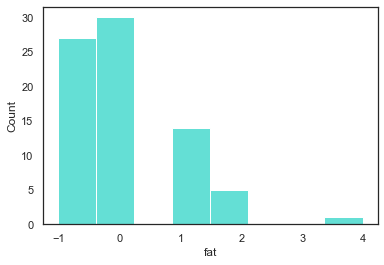

In [43]:
sns.histplot(x='fat',data=cereals,color='#30D5C8')

### 10. As an extension of 7th step, Generate a new Pandas DataFrame with the following columns based on the Training Dataset: Split Ratio | Random State | Total Number of Entries | Count of Kellogg's | Count of Nestle | Count of Other Brands

In [44]:
p = pd.DataFrame(columns = ["Split Ratio", "Random state", "Total Number of Entries","Count of Kellogg's","Count of Nestle","Count of Other Brands"])
p

,Split Ratio,Random state,Total Number of Entries,Count of Kellogg's,Count of Nestle,Count of Other Brands


In [45]:
train_data ['mfr'].count()

69

In [47]:
train_data ['mfr'].value_counts()

Other Brands    28
Kellog's        21
Nestle          20
Name: mfr, dtype: int64

In [48]:
train_data1 ['mfr'].count()

38

In [49]:
train_data1 ['mfr'].value_counts()

Other Brands    13
Kellog's        13
Nestle          12
Name: mfr, dtype: int64

In [50]:
train_data2 ['mfr'].count()

53

In [51]:
train_data2 ['mfr'].value_counts()

Other Brands    21
Nestle          17
Kellog's        15
Name: mfr, dtype: int64

In [54]:
data=[{'Split Ratio':'70:30','Random State':47,'Total Number of Entries':53,'Count of Kelloggs':16,'Count of Nestle':14,'Count of Other Brands':23}
,{'Split Ratio':'80:20','Random State':47,'Total Number of Entries':61,'Count of Kelloggs':19,'Count of Nestle':18,'Count of Other Brands':24}
,{'Split Ratio':'60:40','Random State':25,'Total Number of Entries':46,'Count of Kelloggs':15,'Count of Nestle':11,'Count of Other Brands':20}
]
df1=p.append(data,ignore_index=True)
df1

,Split Ratio,Random state,Total Number of Entries,Count of Kellogg's,Count of Nestle,Count of Other Brands,Random State,Count of Kelloggs
0,70:30,NaN,53,NaN,14,23,47.0,16.0
1,80:20,NaN,61,NaN,18,24,47.0,19.0
2,60:40,NaN,46,NaN,11,20,25.0,15.0


## Conclusion :
### I learnt how to import the cereal data set, replace column values, and produce barplots, boxplots, and hostograms in this experiment. We were able to understand how different salers work in Python, as well as the differences between them, by using the visualisations. We also created a new Pandas Dataframe using the train test split module.


## References :

https://towardsdatascience.com/using-the-pandas-append-function-for-dataframes-84e30f7c5099
https://www.kite.com/python/answers/how-to-replace-column-values-in-a-pandas-dataframe-in-python
https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/
https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
https://www.geeksforgeeks.org/how-to-make-histograms-with-density-plots-with-seaborn-histplot/
